# 1. Read Data

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
import seaborn as sns

In [ ]:
# Connect Google Drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# train dataset
train_df = pd.read_csv('/content/drive/MyDrive/Dataset/taxi_fare/train.csv')
train_df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [ ]:
#test dataset
test_df = pd.read_csv('/content/drive/MyDrive/Dataset/taxi_fare/test.csv')
test_df.tail()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
89856,435.0,2.24,1.0,0,13,13.700,0,0
89857,519.0,2.61,1.0,0,7,13.850,0,0
89858,450.0,2.24,1.0,0,0,26.625,0,1
89859,919.0,4.12,1.0,0,25,30.200,0,1
89860,441.0,3.52,1.0,0,23,6.175,0,0


# 2. Preview Data

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [ ]:
train_df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89861 entries, 0 to 89860
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_duration       89861 non-null  float64
 1   distance_traveled   89861 non-null  float64
 2   num_of_passengers   89861 non-null  float64
 3   fare                89861 non-null  int64  
 4   tip                 89861 non-null  int64  
 5   miscellaneous_fees  89861 non-null  float64
 6   total_fare          89861 non-null  int64  
 7   surge_applied       89861 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 5.5 MB


In [ ]:
corr_df = train_df.corr()
corr_df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,1.000000,0.005774,-0.001477,0.150331,0.029132,0.046432,0.142159,0.029961
distance_traveled,0.005774,1.000000,-0.000299,0.035934,0.013487,0.021734,0.036677,0.005567
num_of_passengers,-0.001477,-0.000299,1.000000,0.013224,0.007277,0.010044,0.014234,0.006360
fare,0.150331,0.035934,0.013224,1.000000,0.302044,0.299321,0.966748,0.146687
tip,0.029132,0.013487,0.007277,0.302044,1.000000,0.320919,0.508639,0.239334
miscellaneous_fees,0.046432,0.021734,0.010044,0.299321,0.320919,1.000000,0.452568,0.715497
total_fare,0.142159,0.036677,0.014234,0.966748,0.508639,0.452568,1.000000,0.267350
surge_applied,0.029961,0.005567,0.006360,0.146687,0.239334,0.715497,0.267350,1.000000


In [ ]:
mask = np.ones_like(corr_df, dtype = bool)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

In [ ]:
mask = np.triu(mask)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

In [ ]:
adj_corr_df = corr_df.iloc[1:,:-1]
adj_corr_df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare
distance_traveled,0.005774,1.000000,-0.000299,0.035934,0.013487,0.021734,0.036677
num_of_passengers,-0.001477,-0.000299,1.000000,0.013224,0.007277,0.010044,0.014234
fare,0.150331,0.035934,0.013224,1.000000,0.302044,0.299321,0.966748
tip,0.029132,0.013487,0.007277,0.302044,1.000000,0.320919,0.508639
miscellaneous_fees,0.046432,0.021734,0.010044,0.299321,0.320919,1.000000,0.452568
total_fare,0.142159,0.036677,0.014234,0.966748,0.508639,0.452568,1.000000
surge_applied,0.029961,0.005567,0.006360,0.146687,0.239334,0.715497,0.267350


In [ ]:
adj_mask = mask[1:,:-1]
adj_mask

array([[False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False]])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'trip_duration'),
  Text(1.5, 0, 'distance_traveled'),
  Text(2.5, 0, 'num_of_passengers'),
  Text(3.5, 0, 'fare'),
  Text(4.5, 0, 'tip'),
  Text(5.5, 0, 'miscellaneous_fees'),
  Text(6.5, 0, 'total_fare')])

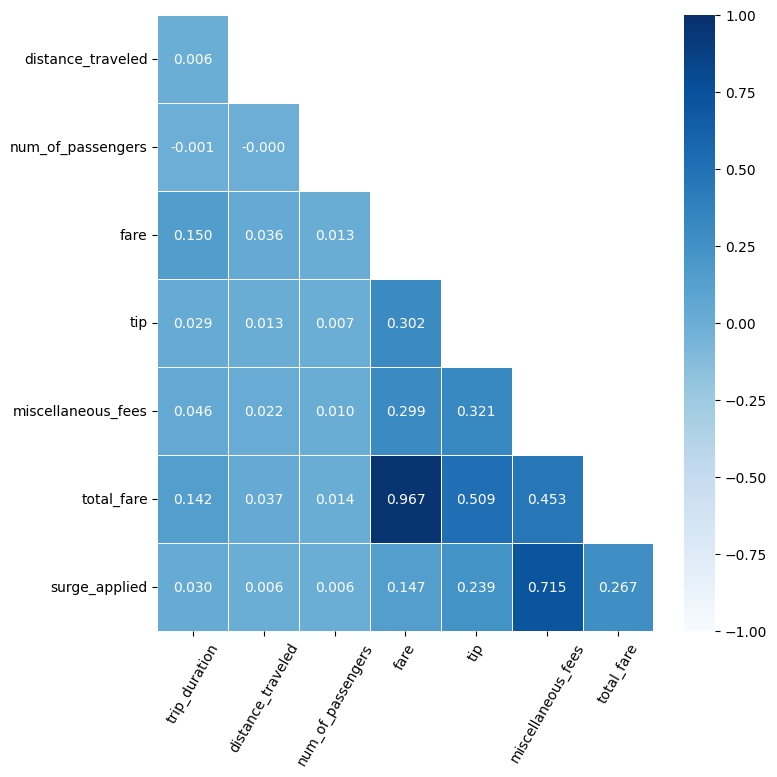

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(
    data = adj_corr_df,
    mask = adj_mask,
    cmap = "Blues",
    linecolor = "White",
    linewidth = 0.5,
    annot = True,
    fmt = ".3f",
    vmin = -1,
    vmax = 1
)
plt.xticks(rotation=60)

#3. Data Pre-Processing

In [ ]:
categorical_features = ['num_of_passengers','surge_applied']
def Convert_2_catFeature(df, features):
  for feature in features:
    df[feature] = df[feature].astype("category")

Convert_2_catFeature(train_df, categorical_features)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   trip_duration       209673 non-null  float64 
 1   distance_traveled   209673 non-null  float64 
 2   num_of_passengers   209673 non-null  category
 3   fare                209673 non-null  float64 
 4   tip                 209673 non-null  int64   
 5   miscellaneous_fees  209673 non-null  float64 
 6   total_fare          209673 non-null  float64 
 7   surge_applied       209673 non-null  category
dtypes: category(2), float64(5), int64(1)
memory usage: 10.0 MB


In [ ]:
train_df.describe(include="category")

,num_of_passengers,surge_applied
count,209673.0,209673
unique,10.0,2
top,1.0,0
freq,179229.0,150855


In [ ]:
train_df.describe()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,99.623431,13.030824,15.136829,127.791084
std,4775.653621,125.217419,85.602702,20.367764,12.553436,98.797374
min,0.000000,0.020000,0.000000,0.000000,-0.500000,0.000000
25%,446.000000,1.950000,52.500000,0.000000,6.000000,70.200000
50%,707.000000,3.200000,75.000000,9.000000,9.750000,101.700000
75%,1098.000000,5.730000,116.250000,20.000000,26.450000,152.250000
max,86387.000000,57283.910000,4466.250000,2500.000000,435.000000,4472.250000


In [ ]:
train_df['num_of_passengers'].value_counts().sort_values(ascending = False)

1.0    179229
2.0     17896
5.0      4713
6.0      3382
3.0      2757
4.0       908
0.0       753
8.0        25
9.0         8
7.0         2
Name: num_of_passengers, dtype: int64

# 4. Train & Test split

In [ ]:
train_df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [ ]:
numerical_features = ['trip_duration','distance_traveled','tip','miscellaneous_fees']

features = numerical_features + categorical_features

X = train_df[features].values
y = train_df['fare'].values

In [ ]:
train_df[features]

,trip_duration,distance_traveled,tip,miscellaneous_fees,num_of_passengers,surge_applied
0,748.0,2.75,24,6.300,1.0,0
1,1187.0,3.43,24,13.200,1.0,0
2,730.0,3.12,0,26.625,1.0,1
3,671.0,5.63,0,9.750,3.0,0
4,329.0,2.09,12,13.200,1.0,0
...,...,...,...,...,...,...
209668,1617.0,8.42,47,5.800,1.0,0
209669,438.0,1.29,12,34.575,1.0,1
209670,571.0,2.82,0,6.000,1.0,0
209671,491.0,2.16,0,13.500,1.0,0


In [ ]:
train_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   trip_duration       209673 non-null  float64 
 1   distance_traveled   209673 non-null  float64 
 2   tip                 209673 non-null  int64   
 3   miscellaneous_fees  209673 non-null  float64 
 4   num_of_passengers   209673 non-null  category
 5   surge_applied       209673 non-null  category
dtypes: category(2), float64(3), int64(1)
memory usage: 6.8 MB


In [ ]:
#Train & Valid split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
X_train.shape

(167738, 6)

In [ ]:
#Feature Scaling
sc = StandardScaler()

X_train[:,:4] = sc.fit_transform(X_train[:,:4])
X_train

array([[ 1.85122585,  0.12771045, -0.63370843, -0.72777258,  1.        ,
         0.        ],
       [-0.11424926, -0.01831397, -0.63370843,  0.91269284,  1.        ,
         1.        ],
       [-0.16200215, -0.02381489,  0.14162487, -0.69396905,  1.        ,
         0.        ],
       ...,
       [ 0.00682333, -0.0075979 ,  1.01387484,  1.49530662,  1.        ,
         1.        ],
       [-0.07642728, -0.01367034, -0.63370843, -0.72777258,  2.        ,
         0.        ],
       [-0.14700013, -0.02502938, -0.24604178, -0.76754144,  1.        ,
         0.        ]])

In [ ]:
X_valid[:,:4] = sc.transform(X_valid[:,:4])
X_valid

array([[-0.16031178, -0.02238608, -0.63370843, -0.72777258,  1.        ,
         0.        ],
       [-0.00289628,  0.01554883, -0.63370843, -0.72777258,  1.        ,
         0.        ],
       [-0.09142929, -0.01595644, -0.63370843,  1.50922573,  1.        ,
         1.        ],
       ...,
       [ 0.24093927,  0.02540762, -0.63370843, -0.42950614,  1.        ,
         0.        ],
       [-0.18672377, -0.02817276, -0.00375012,  0.89877374,  1.        ,
         1.        ],
       [-0.12101073,  0.00483275, -0.63370843, -0.72777258,  1.        ,
         0.        ]])

# 5. Linear Regresstion Model

In [ ]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lreg.predict(X_valid)
y_pred

array([ 72.71647441,  74.62309705, 108.07679964, ...,  85.62569792,
       102.62785614,  73.22879063])

In [ ]:
pd.DataFrame({'y_valid': y_valid, 'y_pred': y_pred})

,y_valid,y_pred
0,48.75,72.716474
1,127.50,74.623097
2,67.50,108.076800
3,48.75,88.913522
4,93.75,123.803070
...,...,...
41930,45.00,80.612411
41931,108.75,91.151060
41932,198.75,85.625698
41933,37.50,102.627856


In [ ]:
# Validation Model
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MSE: ", mean_squared_error(y_true=y_valid, y_pred=y_pred))
print('MAE: ', mean_absolute_error(y_true = y_valid, y_pred = y_pred))

MSE:  5323.598907096623
MAE:  43.21007130130763


`Mean Squared Error`

![alt text](https://images.viblo.asia/84b4ecee-cb87-4fdb-9632-bb7546aad662.png "Mean Squared Error")

`Mean Absolute Error`

![alt text](https://images.viblo.asia/fcdeb57d-37a1-474c-a269-fa258757429c.png "Mean Absolute Error")

# 6. DecisionTreeRegressor Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
y_tree_pred = dtree.predict(X_valid)
y_tree_pred

array([ 52.5 , 127.5 ,  71.25, ..., 187.5 ,  41.25,  97.5 ])

In [ ]:
pd.DataFrame({'y_valid': y_valid, 'y_pred':y_tree_pred})

,y_valid,y_pred
0,48.75,52.50
1,127.50,127.50
2,67.50,71.25
3,48.75,48.75
4,93.75,93.75
...,...,...
41930,45.00,45.00
41931,108.75,105.00
41932,198.75,187.50
41933,37.50,41.25


In [ ]:
# Validation Model
print("MSE: ", mean_squared_error(y_true=y_valid, y_pred=y_tree_pred))
print('MAE: ', mean_absolute_error(y_true = y_valid, y_pred = y_tree_pred))

MSE:  2162.825528989579
MAE:  7.588929657292749


# 7. Predictions On Test Datasets

In [ ]:
test_df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0
...,...,...,...,...,...,...,...,...
89856,435.0,2.24,1.0,0,13,13.700,0,0
89857,519.0,2.61,1.0,0,7,13.850,0,0
89858,450.0,2.24,1.0,0,0,26.625,0,1
89859,919.0,4.12,1.0,0,25,30.200,0,1


In [ ]:
Convert_2_catFeature(test_df, categorical_features)

In [ ]:
X_test = test_df[features].values
X_test

array([[1.0760e+03, 4.1800e+00, 0.0000e+00, 1.3500e+01, 1.0000e+00,
        0.0000e+00],
       [4.2900e+02, 1.4800e+00, 0.0000e+00, 1.3500e+01, 4.0000e+00,
        0.0000e+00],
       [8.5600e+02, 4.1500e+00, 2.4000e+01, 6.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [4.5000e+02, 2.2400e+00, 0.0000e+00, 2.6625e+01, 1.0000e+00,
        1.0000e+00],
       [9.1900e+02, 4.1200e+00, 2.5000e+01, 3.0200e+01, 1.0000e+00,
        1.0000e+00],
       [4.4100e+02, 3.5200e+00, 2.3000e+01, 6.1750e+00, 1.0000e+00,
        0.0000e+00]])

In [ ]:
X_test[:,:4] = sc.transform(X_test[:,:4])
X_test

array([[-0.01979996, -0.00681205, -0.63370843, -0.1312397 ,  1.        ,
         0.        ],
       [-0.15650845, -0.02610099, -0.63370843, -0.1312397 ,  4.        ,
         0.        ],
       [-0.06628507, -0.00702637,  0.52929152, -0.72777258,  1.        ,
         0.        ],
       ...,
       [-0.15207123, -0.02067151, -0.63370843,  0.91269284,  1.        ,
         1.        ],
       [-0.05297343, -0.00724069,  0.57774986,  1.19704018,  1.        ,
         1.        ],
       [-0.1539729 , -0.01152712,  0.48083319, -0.71385348,  1.        ,
         0.        ]])

In [ ]:
# DecisionTreeRegressor
fare_pred = dtree.predict(X_test)
fare_pred

array([105.  ,  48.75,  86.25, ...,  56.25,  90.  ,  63.75])

In [ ]:
test_df['fare'] = fare_pred
test_df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,105.00,0,13.500,0,0
1,429.0,1.48,4.0,48.75,0,13.500,0,0
2,856.0,4.15,1.0,86.25,24,6.000,0,0
3,622.0,3.22,1.0,67.50,15,5.625,0,0
4,507.0,3.98,1.0,112.50,0,2.250,0,0
...,...,...,...,...,...,...,...,...
89856,435.0,2.24,1.0,52.50,13,13.700,0,0
89857,519.0,2.61,1.0,60.00,7,13.850,0,0
89858,450.0,2.24,1.0,56.25,0,26.625,0,1
89859,919.0,4.12,1.0,90.00,25,30.200,0,1


In [ ]:
test_df['total_fare'] = test_df['fare'] + test_df['tip'] + test_df['miscellaneous_fees']
test_df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,105.00,0,13.500,118.500,0
1,429.0,1.48,4.0,48.75,0,13.500,62.250,0
2,856.0,4.15,1.0,86.25,24,6.000,116.250,0
3,622.0,3.22,1.0,67.50,15,5.625,88.125,0
4,507.0,3.98,1.0,112.50,0,2.250,114.750,0
...,...,...,...,...,...,...,...,...
89856,435.0,2.24,1.0,52.50,13,13.700,79.200,0
89857,519.0,2.61,1.0,60.00,7,13.850,80.850,0
89858,450.0,2.24,1.0,56.25,0,26.625,82.875,1
89859,919.0,4.12,1.0,90.00,25,30.200,145.200,1


Write to file `submission.csv`

In [ ]:
test_df['total_fare'].to_csv("/content/drive/MyDrive/Dataset/taxi_fare/submission.csv", index = False)

In [ ]:
test_df.shape

(89861, 8)